In [70]:
import pandas as pd 
import numpy as np 
import sklearn.feature_extraction.text as ft
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import os 
import sys

In [35]:
df = pd.read_csv('data/enron/enron_spam_data.csv', sep=',')
df = df.fillna('')
df = df.astype('str')
df['Text'] = df.apply(lambda x: x['Subject'] + ', ' + x['Message'], axis=1)

In [36]:
df.columns

Index(['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date', 'Text'], dtype='object')

In [57]:
labels = np.where(df['Spam/Ham'].values == 'ham', 0, 1)
texts = df['Text'].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.5, random_state=420, stratify=labels)

In [71]:
tfidf_vectorizer = ft.TfidfVectorizer()
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_test = tfidf_vectorizer.transform(X_test)

In [72]:
clf = SVC()
clf.fit(X_tfidf_train, y_train)

SVC()

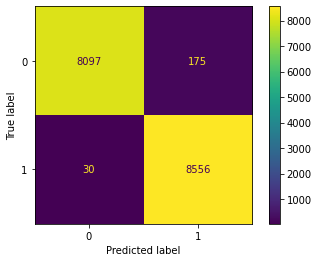

In [73]:
ConfusionMatrixDisplay.from_estimator(clf, X_tfidf_test, y_test)
plt.plot();